In [112]:
import pandas as pd

#loading dataset
df = pd.read_csv('Dataset/Student_performance_data _.csv')

# Verifica dei primi 5 record
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## ANALISI DESCRITTIVA

In [3]:
#eliminiamo la colonna StudentId che non è utile
df = df.drop("StudentID", axis=1)
df = df.drop("GPA", axis=1) #tolto perchè nella classificazione usiamo Grade Class che sono i valori interi di GPA
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [4]:
#numero di righe - studenti del dataset
print(len(df))

age = df['Age'].unique()
conteggio_studenti_età = df['Age'].value_counts()
print(conteggio_studenti_età)

2392
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


C:\Users\lucab\AppData\Local\Temp\ipykernel_19764\1761622020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=df, palette='Reds')


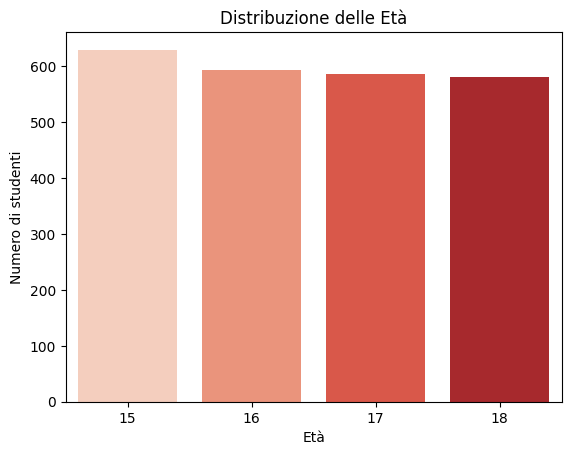

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un grafico a barre con Seaborn
sns.countplot(x='Age', data=df, palette='Reds')

# Aggiungi etichette e titolo
plt.xlabel('Età')
plt.ylabel('Numero di studenti')
plt.title('Distribuzione delle Età')

# Mostra il grafico
plt.show()

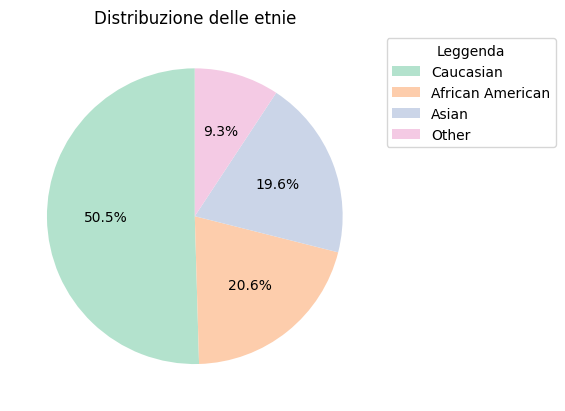

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conta la frequenza di ciascun valore di età
age_counts = df['Ethnicity'].value_counts()

custom_labels = ['Caucasian', 'African American', 'Asian', 'Other']

colors = sns.color_palette('Pastel2', len(age_counts))

fig, ax = plt.subplots()
ax.pie(age_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Aggiungi la leggenda separata
ax.legend(custom_labels, title="Leggenda", loc="upper left", bbox_to_anchor=(1, 1))

# Aggiungi il titolo
plt.title('Distribuzione delle etnie')

# Mostra il grafico
plt.show()


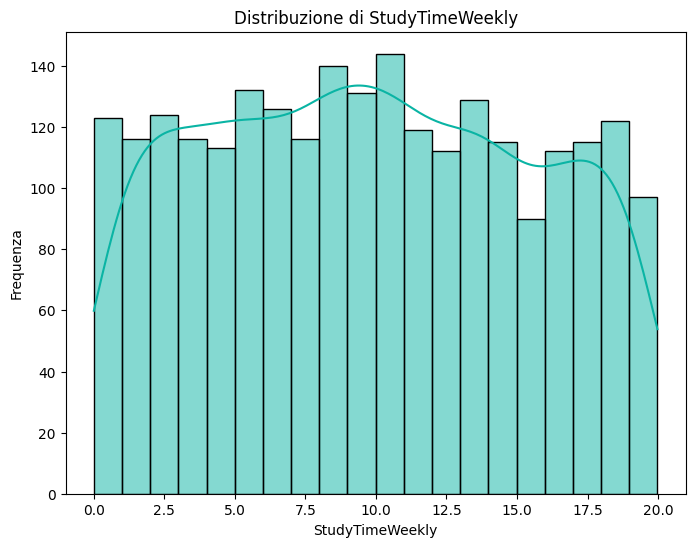

In [7]:

variabile = 'StudyTimeWeekly'

plt.figure(figsize=(8, 6))
sns.histplot(df[variabile], kde=True, bins=20, color='#0ab4a4')
plt.title(f'Distribuzione di {variabile}')
plt.xlabel(variabile)
plt.ylabel('Frequenza')
plt.show()



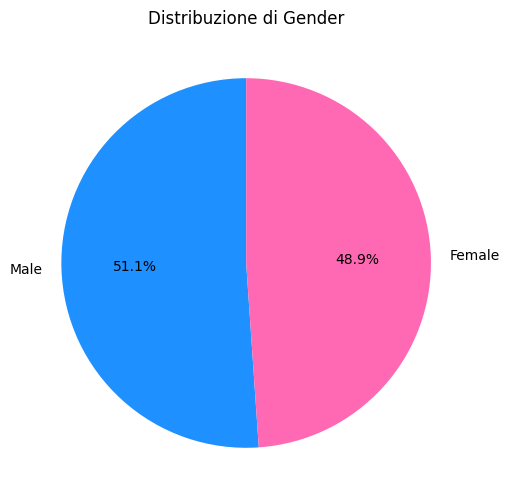

In [8]:
# Calcola la distribuzione di Gender
gender_counts = df['Gender'].value_counts()

# Colori rosa e blu
colors = ['#1E90FF', '#FF69B4']  # Rosa e Blu
labels=['Male', 'Female']

# Crea il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribuzione di Gender')
plt.show()

C:\Users\lucab\AppData\Local\Temp\ipykernel_19764\982941571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='GradeClass', palette="Oranges")


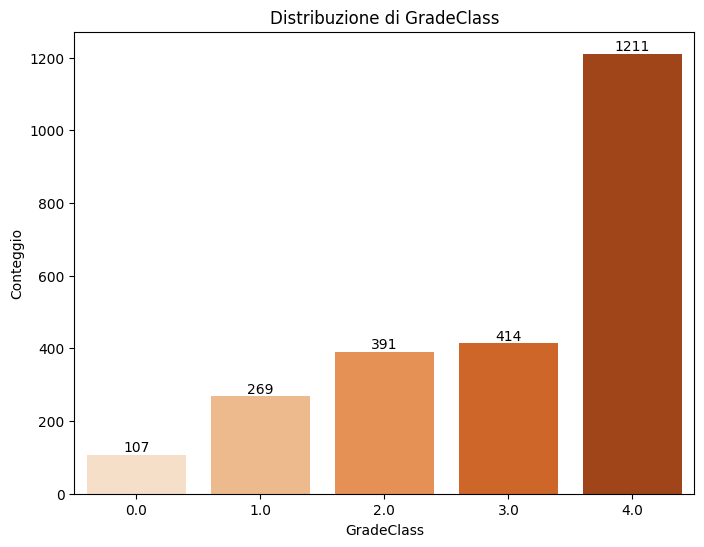

In [9]:
# Distribuzione di GradeClass con annotazioni
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='GradeClass', palette="Oranges")

# Annotazioni sui valori
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.title('Distribuzione di GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Conteggio')
plt.show()


# Bilanciamento dataset

## Prima delle operazioni di Oversampling su 0,1,2,3 e Undersampling su 4

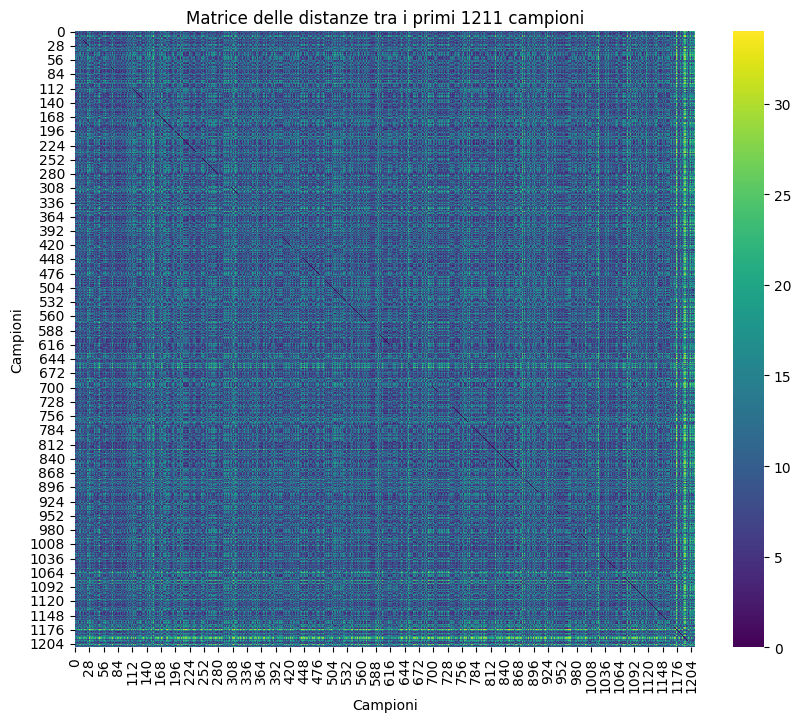

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Funzione per visualizzare la matrice delle distanze come heatmap
def plot_distance_heatmap(X, n_samples=None):
    """
    Visualizza la matrice delle distanze tra i campioni come heatmap.

    Parameters:
    - X: dataframe con i dati dei campioni
    - n_samples: numero di campioni da considerare per la matrice delle distanze.
                 Se non specificato, verranno usati tutti i campioni.
    """
    # Se non viene fornito un valore per n_samples, usa tutti i campioni
    if n_samples is None:
        n_samples = len(X)
    
    # Se n_samples è maggiore del numero di campioni, usa tutti i campioni
    if n_samples > len(X):
        n_samples = len(X)
    
    # Seleziona i primi n_samples campioni
    X_subset = X.iloc[:n_samples]
    
    # Calcola la matrice delle distanze tra i campioni selezionati
    distances = pairwise_distances(X_subset)
    
    # Crea una heatmap della matrice delle distanze
    plt.figure(figsize=(10, 8))  # Imposta la dimensione della figura
    sns.heatmap(distances, cmap='viridis', annot=False, fmt='.2f', cbar=True)
    plt.title(f'Matrice delle distanze tra i primi {n_samples} campioni')
    plt.xlabel('Campioni')
    plt.ylabel('Campioni')
    plt.show()


# Supponiamo che la colonna 'GradeClass' sia la variabile target
y = df['GradeClass']
df1 = df.copy()
X = df1.drop('GradeClass', axis=1)

# Esegui la funzione sulla classe di interesse (ad esempio, GradeClass 4)
X_class = X[y == 4]  # Sostituisci con la classe desiderata

# Ad esempio, visualizza la matrice delle distanze solo per i primi 100 campioni
plot_distance_heatmap(X_class, n_samples=2000)

# Oppure, se vuoi visualizzare tutti i campioni, puoi omettere il parametro n_samples
# plot_distance_heatmap(X_class)


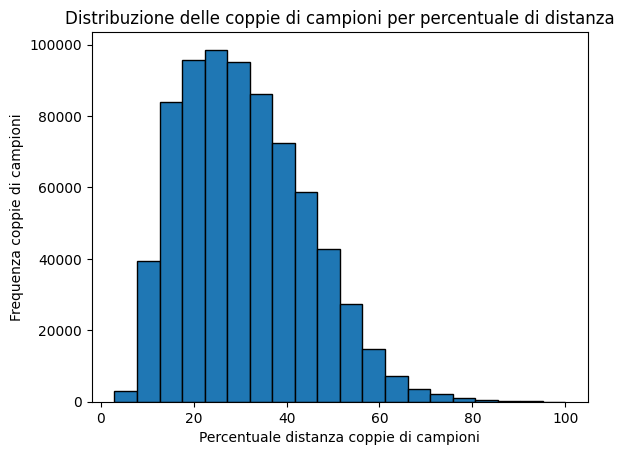

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Supponiamo che la colonna 'GradeClass' sia la variabile target
y = df['GradeClass']
df1 = df.copy()
X = df1.drop('GradeClass', axis=1)

# Funzione per calcolare e visualizzare la distribuzione delle somiglianze
def plot_similarity_distribution(X, bins=20):
    # Calcola la matrice delle distanze
    distances = pairwise_distances(X)
    
    # Estraggo solo la parte superiore triangolare della matrice (senza la diagonale)
    upper_triangular_distances = distances[np.triu_indices(len(X), k=1)]
    
    # Normalizza le distanze in percentuali rispetto alla massima distanza trovata
    max_distance = np.max(upper_triangular_distances)
    normalized_distances = (upper_triangular_distances / max_distance) * 100
    
    # Crea un istogramma delle distanze
    plt.hist(normalized_distances, bins=bins, edgecolor='black')
    plt.title('Distribuzione delle coppie di campioni per percentuale di distanza')
    plt.xlabel('Percentuale distanza coppie di campioni')
    plt.ylabel('Frequenza coppie di campioni')
    plt.show()

# Applica la funzione al dataset della classe di interesse (ad esempio, GradeClass 4)
X_class = X[y == 4]  # Sostituisci con la classe desiderata
plot_similarity_distribution(X_class)

# La percentuale rappresenta la "distanza euclidea L2" per ogni coppia di campione

In [39]:
import numpy as np
from sklearn.metrics import pairwise_distances

# Funzione per calcolare e stampare il numero di coppie di campioni con distanza <= 10% della distanza massima
def count_similar_pairs(X, threshold_percentage=10):
    # Calcola la matrice delle distanze tra i campioni
    distances = pairwise_distances(X)
    
    # Estraggo la parte superiore triangolare della matrice (senza la diagonale)
    upper_triangular_distances = distances[np.triu_indices(len(X), k=1)]
    
    # Trova la distanza massima
    max_distance = np.max(upper_triangular_distances)
    
    # Calcola la soglia del 10% della distanza massima
    threshold = (threshold_percentage / 100) * max_distance
    
    # Conta il numero di coppie con distanza <= alla soglia
    similar_pairs_count = np.sum(upper_triangular_distances <= threshold)
    
    # Stampa il risultato
    print(f"Numero di coppie di campioni con distanza <= {threshold_percentage}% della distanza massima: {similar_pairs_count}")


# Supponiamo che la colonna 'GradeClass' sia la variabile target
y = df['GradeClass']
df1 = df.copy()
X = df1.drop('GradeClass', axis=1)

# Esegui la funzione sulla classe di interesse (ad esempio, GradeClass 4)
X_class = X[y == 4]  # Sostituisci con la classe desiderata
count_similar_pairs(X_class, threshold_percentage=5)


Numero di coppie di campioni con distanza <= 5% della distanza massima: 81


## Dopo delle operazioni di Oversampling su 0,1,2,3 e Undersampling su 4

In [40]:
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/258.3 kB 682.7 kB/s eta 0:00:01
   ------- ------------------------------- 51.2/258.3 kB 435.7 kB/s eta 0:00:01
   ------------------------------- -------- 204.8/258.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.4 MB/s eta 0:00:00


### Come tecnica di OverSampling ho utilizzato la SMOTE, mentre per fare undersampling ho utilizzato una tecnica basata su clusterizzazione.
### Alla fine ho riportato tutti i campioni a 500.

##### Risultati Oversampling:
    - Classe 0: 393 sintetici e 107 naturali
    - Classe 1: 232 sintetici e 268 naturali
    - Classe 2: 109 sintetici e 391 naturali
    - Classe 3: 86 sintetici e 414 naturali

##### Risultati Undersampling:
    - Classe 4: da 1211 campioni a 500 campioni, mediamente clusterizzazione.

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids  # Usa ClusterCentroids invece di RandomUnderSampler
from imblearn.combine import SMOTEENN
import pandas as pd

# Carica il dataset
# Assumiamo che `X` siano le caratteristiche e `y` sia la variabile target (GradeClass)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Applica SMOTE per le classi minoritarie
smote = SMOTE(sampling_strategy={0: 500, 1: 500, 2: 500, 3: 500})  # Puoi adattare i numeri
X_sm, y_sm = smote.fit_resample(X, y)

# Applica ClusterCentroids per l'undersampling della classe maggioritaria
cluster_centroids = ClusterCentroids(sampling_strategy={4: 500}, random_state=42)  # Imposta il numero di centroidi per la classe 4
X_res, y_res = cluster_centroids.fit_resample(X_sm, y_sm)


# Combina X_res e y_res in un DataFrame per creare un nuovo DataFrame bilanciato
df_resampled = pd.DataFrame(X_res, columns=X.columns)  # Usa le stesse colonne di X
df_resampled['GradeClass'] = y_res  # Aggiungi la colonna target bilanciata (y_res)

# Ora df_resampled contiene i dati bilanciati
print(df_resampled.head())  # Visualizza le prime righe del nuovo DataFrame




   Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0   16       1          0                  1        18.444466         0   
1   18       1          0                  1        18.921512         1   
2   18       1          0                  2         7.724728         0   
3   16       0          0                  2         9.697175         1   
4   17       1          3                  0         5.670144         2   

   Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0         0                3                1       0      0             0   
1         1                3                1       1      0             0   
2         0                2                1       1      0             0   
3         1                3                0       0      0             0   
4         1                4                0       0      1             0   

   GradeClass  
0         0.0  
1         0.0  
2         0.0  
3         0.0  


C:\Users\lucab\AppData\Local\Temp\ipykernel_19764\1769661300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_resampled, x='GradeClass', palette="Oranges")


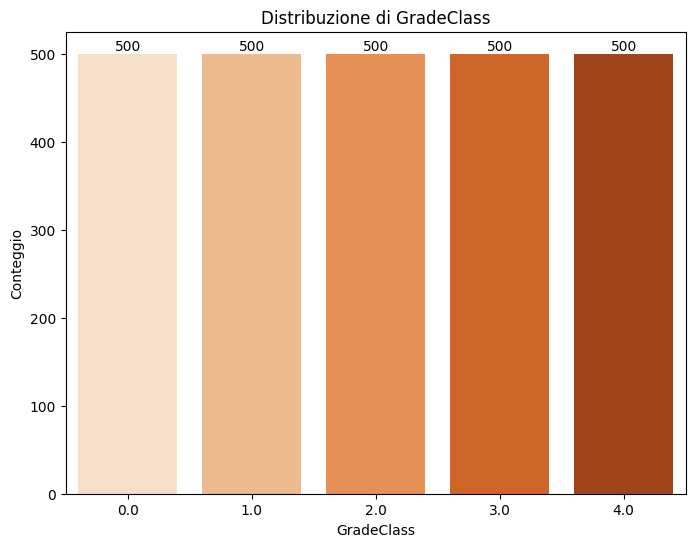

In [43]:
# Distribuzione di GradeClass con annotazioni
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_resampled, x='GradeClass', palette="Oranges")

# Annotazioni sui valori
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.title('Distribuzione di GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Conteggio')
plt.show()


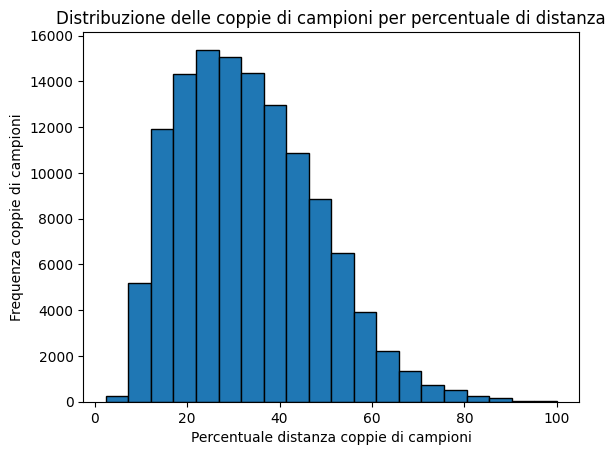

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Supponiamo che la colonna 'GradeClass' sia la variabile target
y = df_resampled['GradeClass']
df1 = df_resampled.copy()
X = df1.drop('GradeClass', axis=1)


# Applica la funzione al dataset della classe di interesse (ad esempio, GradeClass 4)
X_class = X[y == 4]  # Sostituisci con la classe desiderata
plot_similarity_distribution(X_class)

# La percentuale rappresenta la "distanza euclidea L2" per ogni coppia di campione

# Altre operazioni

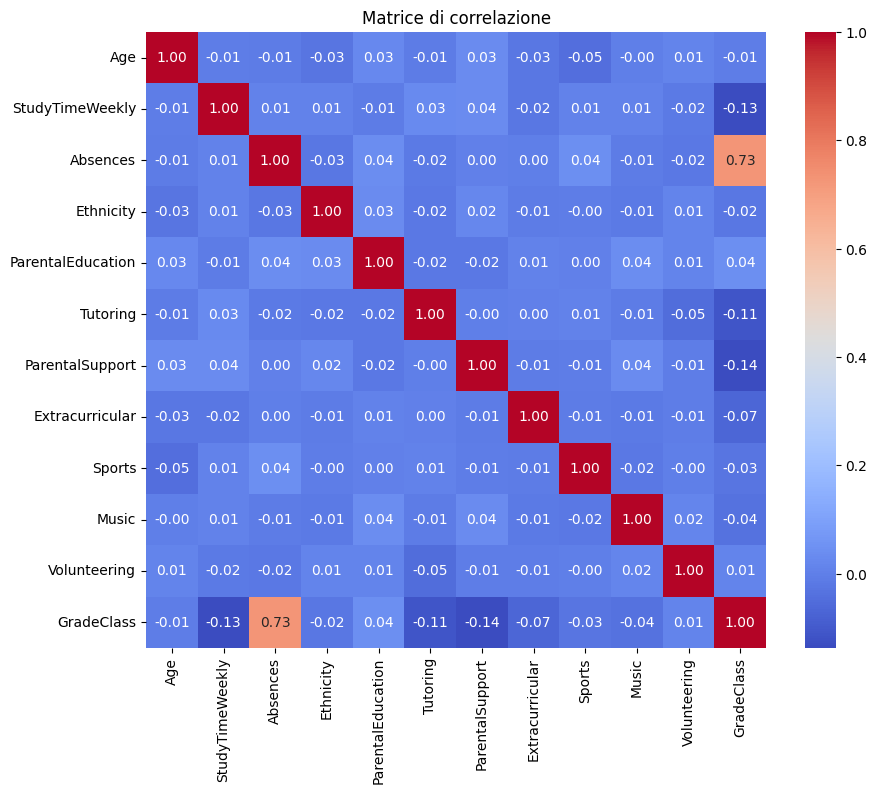

In [150]:
#numerical_cols = [ 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport','GradeClass']
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'Ethnicity','ParentalEducation', 'Tutoring', 'ParentalSupport',	'Extracurricular',	'Sports','Music','Volunteering','GradeClass']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()


/var/folders/wz/z6163tcs0v11556rglm8m09h0000gn/T/ipykernel_4759/572282510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Participates_in_any', y='GradeClass', data=df, palette='Set2')


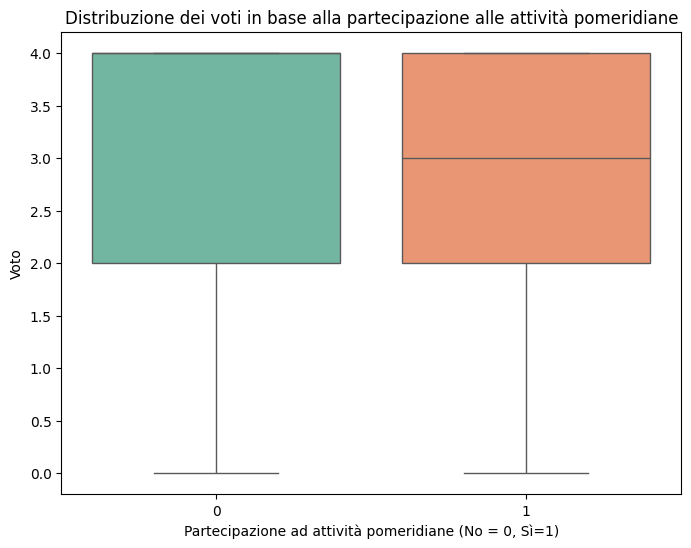

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo una nuova colonna che indica se la persona partecipa ad almeno una delle attività
df['Participates_in_any'] = (df['Extracurricular'] | df['Sports'] | df['Music'] | df['Volunteering']).astype(int)

# Creiamo un boxplot per visualizzare il voto in base alla partecipazione alle attività
plt.figure(figsize=(8, 6))
sns.boxplot(x='Participates_in_any', y='GradeClass', data=df, palette='Set2')

# Aggiungiamo il titolo e le etichette
plt.title('Distribuzione dei voti in base alla partecipazione alle attività pomeridiane')
plt.xlabel('Partecipazione ad attività pomeridiane (No = 0, Sì=1)')
plt.ylabel('Voto')

# Mostriamo il grafico
plt.show()


## PCA


In [4]:
from sklearn.preprocessing import StandardScaler


# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)


Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')


In [146]:
# Normalizza i dati
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

In [147]:
from sklearn.decomposition import PCA

# Applica PCA
pca = PCA(n_components=5)  # Puoi scegliere un numero di componenti minori per ridurre la dimensionalità
principal_components = pca.fit_transform(df_scaled)

# Aggiungi le componenti principali al dataset originale
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])


In [148]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,1.290723,0.845781,0.609389,2.106309,-0.939282
1,0.304457,3.045288,-0.009986,-0.530941,-0.957443
2,-2.541561,0.223354,-0.199692,-0.930726,1.606978
3,0.369841,-0.469429,0.958073,0.122299,-1.057242
4,-1.844212,1.019560,0.079496,0.585599,-1.223931


In [149]:
import pandas as pd

# Matrice dei carichi: mostra come le variabili originali contribuiscono alle componenti principali
loadings = pd.DataFrame(pca.components_, columns=numeric_cols, index=["PC1", "PC2", "PC3", "PC4", "PC5"])  # Puoi adattare a più componenti

print("Carichi delle componenti principali:")
print(loadings)

# Proporzione di varianza spiegata: mostra quanta varianza viene catturata da ogni componente
explained_variance_ratio = pca.explained_variance_ratio_

print("\nProporzione di varianza spiegata:")
for i, variance in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {variance * 100:.2f}%")


Carichi delle componenti principali:
          Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly   
PC1 -0.023414 -0.026742   0.007420          -0.033836         0.078440  \
PC2  0.049439 -0.030005   0.054048          -0.074818         0.100616   
PC3  0.446945  0.359066   0.156267           0.296666        -0.062569   
PC4  0.098998  0.180768  -0.066549          -0.041256         0.583485   
PC5 -0.451742 -0.049196   0.688423           0.213811         0.176519   

     Absences  Tutoring  ParentalSupport  Extracurricular    Sports     Music   
PC1 -0.480628  0.073955         0.106181         0.324783  0.227087  0.205002  \
PC2 -0.466711  0.103019         0.078188        -0.314344 -0.304002 -0.191761   
PC3 -0.067496 -0.411851         0.220848        -0.140721 -0.298533  0.319398   
PC4  0.249139  0.258408         0.518445        -0.180301  0.188906  0.264931   
PC5 -0.011194 -0.188586         0.010161        -0.286633  0.311467 -0.065355   

     Volunteering  GradeClass  

## CLUSTERING

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

X = df[[ 'Gender',  'ParentalEducation', 'StudyTimeWeekly', 
        'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 
        'Sports', 'Music',  'GradeClass']]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = scaler.fit_transform(df[numeric_cols])

/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarni

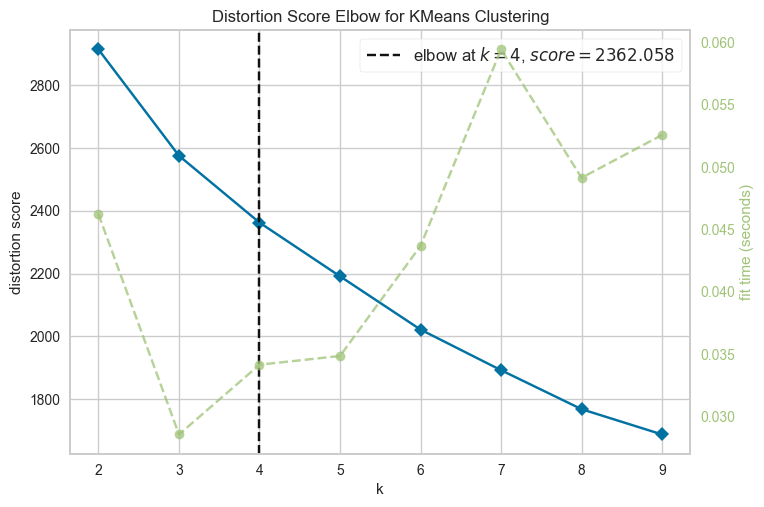

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [126]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

# Creazione del visualizzatore Elbow
visualizer = KElbowVisualizer(model, k=(2, 10))  # Cerca il numero di cluster tra 2 e 10

# Visualizzazione del grafico Elbow
visualizer.fit(X_scaled)
visualizer.show()

/Users/lauraferretti/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


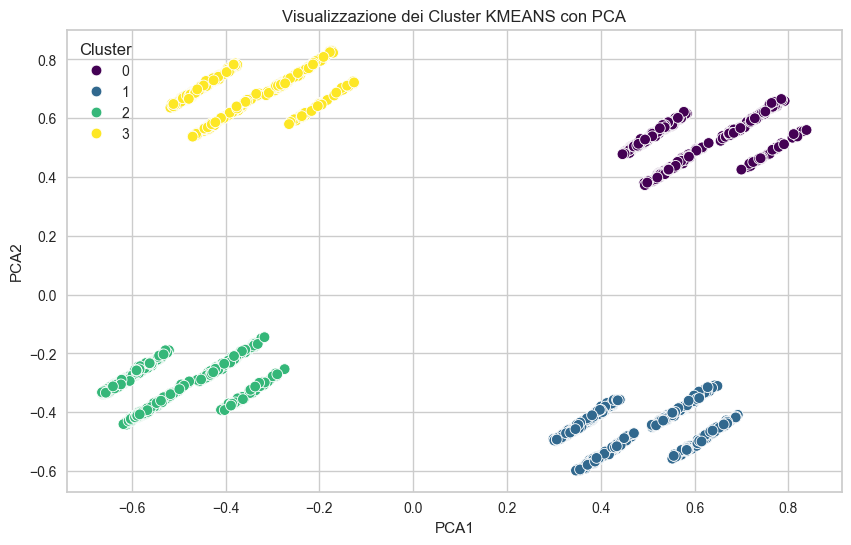

In [149]:
# Scegli il numero di cluster (ad esempio, supponiamo sia 3)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Aggiungi i cluster al dataframe
df['Cluster'] = clusters

# Riduzione dimensionale per la visualizzazione con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creazione di un DataFrame con i dati PCA per la visualizzazione
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60)
plt.title('Visualizzazione dei Cluster KMEANS con PCA')
plt.show()

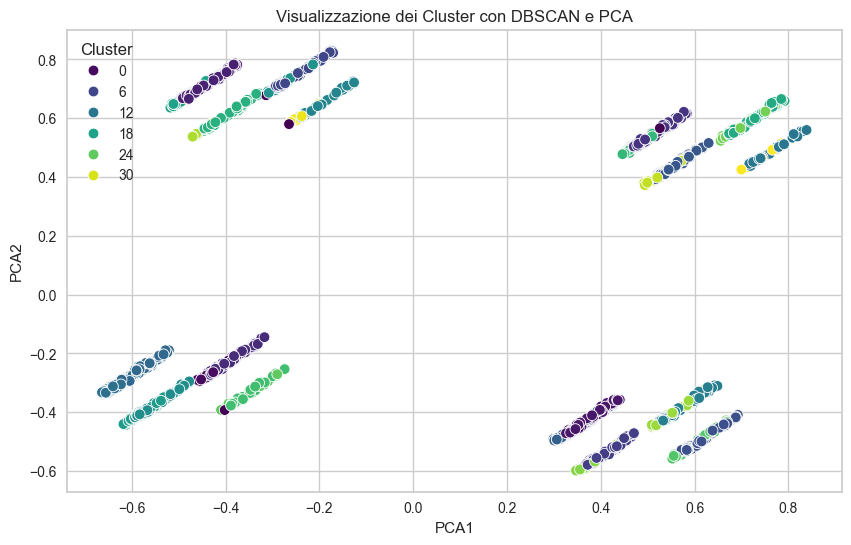

In [140]:
eps = 0.7
min_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Aggiungi le etichette dei cluster al DataFrame originale
df['Cluster'] = dbscan_labels

# Riduzione dimensionale per la visualizzazione con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creazione di un DataFrame con i dati PCA per la visualizzazione
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = dbscan_labels

# Visualizzazione dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=60)
plt.title('Visualizzazione dei Cluster con DBSCAN e PCA')
plt.show()